# Neopythen: potential map bases on Ellenberg(1)




(1) https://www.researchgate.net/publication/235710596_Zeigwerte_von_Pflanzen_in_MittelEuropa

Check ellenberg numbers:

In [1]:
# READ ELLENBERG LEGEND
import pandas as pd
ellenberg_csv = r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\neophytes_ellenberg.csv'
df = pd.read_csv(ellenberg_csv,encoding="ISO-8859-1")
#print(df.to_string()) 



Constrution of datacube with 10m raster files which can be used to calculate the Ellenbergnumbers:




## (1) Reading dims

In [3]:
# Reading libaries:

import os
from pathlib import Path, WindowsPath
from glob import glob
from pathlib import Path
import geopandas as gpd

from pathlib import Path
import geopandas as gpd
import sys
import matplotlib.pyplot as plt

import rasterio
import rasterio.mask
import numpy as np
import subprocess
import pandas as pd
import xarray as xr
import rioxarray as rxr


print("job done")

job done


## (2) Building cube

In [5]:
## reading raster from CWS:

##  base folder on CWS:
base_path = WindowsPath('N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f02_raster_10m_collection/ellenberg')


## AOI
#--------------------------
#min_x = 3316000 
#max_x = 3345000

#max_y = 1780000
#min_y = 1799000 
#--------------------------

## Datasets 01 Lichtzahl:-------------------------------------------
d01_light_raster = os.path.join(base_path, 'shadow_2019_10m_b1.tif')
print(d01_light_raster)
# Open the file:
cube_01 = rxr.open_rasterio(d01_light_raster)
cube_01 = cube_01.to_dataset(name='d01_light_number')
# cube_01

### Dataset 02 Temperatur:-------------------------------------------
d02_temp_raster = os.path.join(base_path, 'air_temperature_2017_month_mean_10m_b12.tif')
print(d02_temp_raster)
# Open the file:
cube_02 = rxr.open_rasterio(d02_temp_raster)
cube_02 = cube_02.to_dataset(name='d02_temperatur_number')


### Dataset 02 Temperatur:-------------------------------------------
d02_temp_raster = os.path.join(base_path, 'air_temperature_2017_month_mean_10m_b12.tif')
print(d02_temp_raster)
# Open the file:
cube_02 = rxr.open_rasterio(d02_temp_raster)
cube_02 = cube_02.to_dataset(name='d02_temperatur_number')

### Dataset 03 Reaktionszahl (ph):-------------------------------------------
d03_reaction_ph_raster = os.path.join(base_path, 'pH_CaCl_10m_b1.tif')
print(d03_reaction_ph_raster)
# Open the file:
cube_03 = rxr.open_rasterio(d03_reaction_ph_raster)
cube_03 = cube_03.to_dataset(name='d03_reaction_number')


### Dataset 04 Feuchtezahl:-------------------------------------------
d04_wet_raster = os.path.join(base_path, 'twi_2019_10m_b1.tif')
print(d04_wet_raster)
# Open the file:
cube_04 = rxr.open_rasterio(d02_temp_raster)
cube_04 = cube_04.to_dataset(name='d04_wetness_number')


### Dataset 05 Kontinentalitätszahl :-------------------------------------------
d05_conti_raster = os.path.join(base_path, 'konti_bbox_luxembourg_city_extent_10m_8bit.tif') # one value for all cells
print(d05_conti_raster)
# Open the file:
cube_05 = rxr.open_rasterio(d05_conti_raster)
cube_05 = cube_05.to_dataset(name='d05_conti_number')


### Dataset 06 water surface (river, lakes, ponds) :-------------------------------------------
d06_watersurface_raster = os.path.join(base_path, 'land_cover_2021_10m_b1.tif')
print(d06_watersurface_raster)
# Open the file:
cube_06 = rxr.open_rasterio(d06_watersurface_raster)
cube_06 = cube_06.to_dataset(name='d06_watersurface')



N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\shadow_2019_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\air_temperature_2017_month_mean_10m_b12.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\air_temperature_2017_month_mean_10m_b12.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\pH_CaCl_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\twi_2019_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\konti_bbox_luxembourg_city_extent_10m_8bit.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhte

Merging the single cubes

In [6]:
## Merge datasets:
combined_array = xr.merge([cube_01, cube_02,cube_03, cube_04,cube_05 ,cube_06 ])

### (2.1) testing cubes

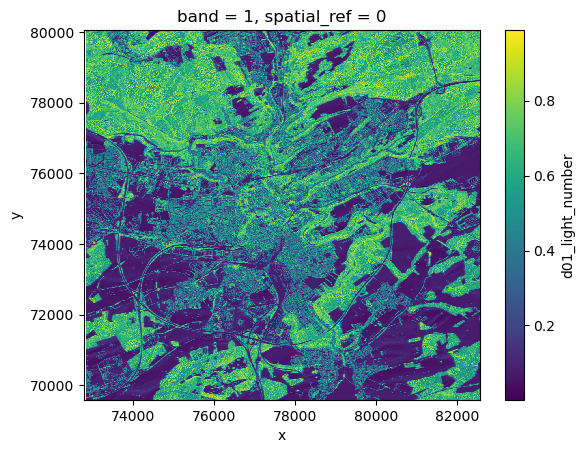

In [8]:
#combined_array = cube_01

combined_array.d01_light_number.sel(band=1).plot()
#combined_array.d07_population_2021_1km.sel(band=1).plot()





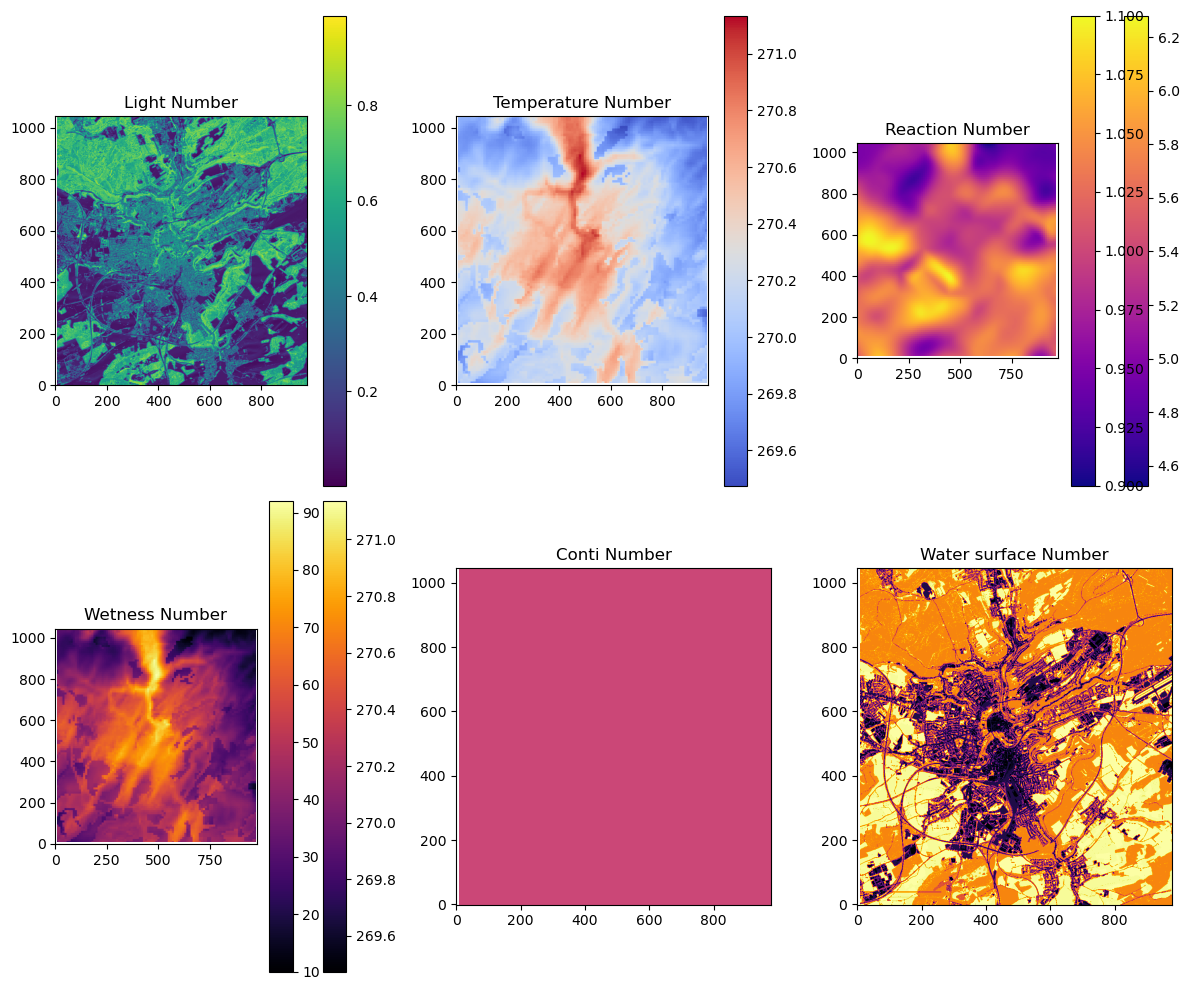

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p1, p2, p3, and p4 are 2D numpy arrays
p1 = combined_array.d01_light_number.sel(band=1).astype(np.float32)
p2 = combined_array.d02_temperatur_number.sel(band=1).astype(np.float32)
p3 = combined_array.d03_reaction_number.sel(band=1).astype(np.float32)
p4 = combined_array.d04_wetness_number.sel(band=1).astype(np.float32)
p5 = combined_array.d05_conti_number.sel(band=1).astype(np.float32)
p6 = combined_array.d06_watersurface.sel(band=1).astype(np.float32)


# Create a figure with four subplots in a 2x2 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# Flatten the axes array to easily access individual subplots
axes = axes.flatten()

# Plot p1
im1 = axes[0].imshow(p1, cmap='viridis', origin='lower')
axes[0].set_title('Light Number')
plt.colorbar(im1, ax=axes[0], orientation='vertical')

# Plot p2
im2 = axes[1].imshow(p2, cmap='coolwarm', origin='lower')
axes[1].set_title('Temperature Number')
plt.colorbar(im2, ax=axes[1], orientation='vertical')

# Plot p3
im3 = axes[2].imshow(p3, cmap='plasma', origin='lower')
axes[2].set_title('Reaction Number')
plt.colorbar(im3, ax=axes[2], orientation='vertical')

# Plot p4
im4 = axes[3].imshow(p4, cmap='inferno', origin='lower')
axes[3].set_title('Wetness Number')
plt.colorbar(im4, ax=axes[3], orientation='vertical')

# Plot p5
im3 = axes[4].imshow(p5, cmap='plasma', origin='lower')
axes[4].set_title('Conti Number')
plt.colorbar(im3, ax=axes[2], orientation='vertical')

# Plot p6
im4 = axes[5].imshow(p6, cmap='inferno', origin='lower')
axes[5].set_title('Water surface Number')
plt.colorbar(im4, ax=axes[3], orientation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
